In [17]:
#Importations
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [21]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [22]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [23]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [24]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [25]:
# Create our session (link) from Python to the DB
Session = Session(engine)

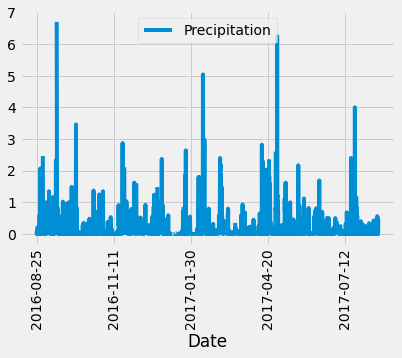

In [68]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
#Latest Date
Latestdate = Session.query(Measurement.date).order_by(Measurement.date.desc()).first()
#Year ago
Year_ago = dt.datetime(2017, 8, 23) - dt.timedelta(weeks=52)
# Perform a query to retrieve the data and precipitation scores
Precipsql = Session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= Year_ago).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
Precip_df = pd.DataFrame(Precipsql, columns = ['Date', 'Precipitation'])
Precip_df.set_index('Date', inplace = True)
# Sort the dataframe by date
Precip_df.sort_values(by = 'Date', inplace = True)
# Use Pandas Plotting with Matplotlib to plot the data
Precip_df.plot(rot = 90)

In [27]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Precip_df.describe()

,Precipitation
count,2009.000000
mean,0.172344
std,0.452818
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [28]:
# Design a query to show how many stations are available in this dataset?
Stationnumber = Session.query(Measurement.station).group_by('station').count()
Stationnumber

9

In [29]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
Session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()    

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [65]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
Min=Session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
Max=Session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
Avg=Session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

#Print the data
print(f'The minimum temperature recorded by this station was {Min} degrees. The maximum was {Max}, while the average was {Avg}.')

The minimum temperature recorded by this station was [(54.0,)] degrees. The maximum was [(85.0,)], while the average was [(71.66378066378067,)].


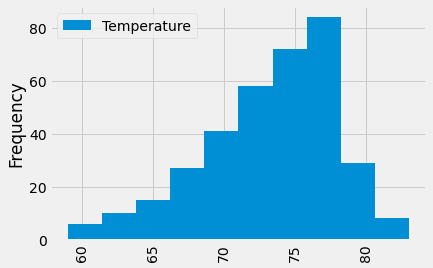

In [77]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#Initial Query
Tempsql = Session.query(Measurement.date, Measurement.station, Measurement.tobs).\
    filter(Measurement.date >= Year_ago).\
    filter(Measurement.station == 'USC00519281').all()
#Make a Dataframe
Temp_df = pd.DataFrame(Tempsql, columns = ['Date', 'Station', 'Temperature'])
#Make sure it's in order
Temp_df.sort_values(by = 'Date', inplace = True)
#Plot it.
Temp_df.plot(kind = 'hist', rot = 90)